In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    precision_recall_curve,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)


from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('heart_disease.csv')
df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_stroke     4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [4]:
df.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,0.494101,9.003089,0.029630,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,0.500024,11.920094,0.169584,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [5]:
df.isna().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_stroke         0
dtype: int64

In [6]:
df = df.dropna().copy()

In [7]:
df['Heart_stroke'].value_counts()

Heart_stroke
No     3099
yes     557
Name: count, dtype: int64

In [8]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,Male,58,graduate,0,0.0,0.0,no,1,0,187.0,141.0,81.0,24.96,80.0,81.0,No
4232,Male,68,uneducated,0,0.0,0.0,no,1,0,176.0,168.0,97.0,23.14,60.0,79.0,yes
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No


In [9]:
df['Heart_stroke'] = df['Heart_stroke'].map({'yes': 1, 'No': 0})
df['prevalentStroke'] = df['prevalentStroke'].map({'yes': 1, 'no': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['education'] = pd.Categorical(
    df['education'],
    categories=['uneducated', 'primaryschool', 'graduate', 'postgraduate']
)
df = pd.get_dummies(df, columns=['education'], drop_first=True)
# если все три параметра 0 то это uneducated
df

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_stroke,education_primaryschool,education_graduate,education_postgraduate
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,False,False,True
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,True,False,False
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,False,False,False
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,False,True,False
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0,False,True,False
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1,False,False,False
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1,False,False,False
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,False,True,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   3656 non-null   int64  
 1   age                      3656 non-null   int64  
 2   currentSmoker            3656 non-null   int64  
 3   cigsPerDay               3656 non-null   float64
 4   BPMeds                   3656 non-null   float64
 5   prevalentStroke          3656 non-null   int64  
 6   prevalentHyp             3656 non-null   int64  
 7   diabetes                 3656 non-null   int64  
 8   totChol                  3656 non-null   float64
 9   sysBP                    3656 non-null   float64
 10  diaBP                    3656 non-null   float64
 11  BMI                      3656 non-null   float64
 12  heartRate                3656 non-null   float64
 13  glucose                  3656 non-null   float64
 14  Heart_stroke             3656

In [11]:
df

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_stroke,education_primaryschool,education_graduate,education_postgraduate
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,False,False,True
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,True,False,False
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,False,False,False
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,False,True,False
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0,False,True,False
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1,False,False,False
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1,False,False,False
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,False,True,False


In [12]:
print(df)

      Gender  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0          1   39              0         0.0     0.0                0   
1          0   46              0         0.0     0.0                0   
2          1   48              1        20.0     0.0                0   
3          0   61              1        30.0     0.0                0   
4          0   46              1        23.0     0.0                0   
...      ...  ...            ...         ...     ...              ...   
4231       1   58              0         0.0     0.0                0   
4232       1   68              0         0.0     0.0                0   
4233       1   50              1         1.0     0.0                0   
4234       1   51              1        43.0     0.0                0   
4237       0   52              0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  106.0   70.

Как Senior ML Engineer, я проведу глубокий анализ данных (EDA), подготовлю их для обучения и построю прогностическую модель, уделяя внимание интерпретируемости и качеству метрик.

Текущий код выполнил базовую очистку и кодирование. Далее мы проанализируем взаимосвязи признаков и обучим классификатор.


### 1. Исследовательский анализ данных (EDA) и визуализация
На данном этапе важно оценить дисбаланс классов и корреляцию признаков, чтобы избежать мультиколлинеарности.


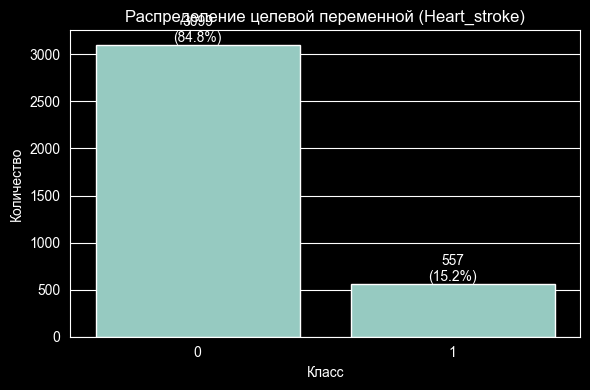

In [13]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(
    x='Heart_stroke',
    data=df
)

total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(
        f'{count}\n({count / total:.1%})',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )

plt.title('Распределение целевой переменной (Heart_stroke)')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

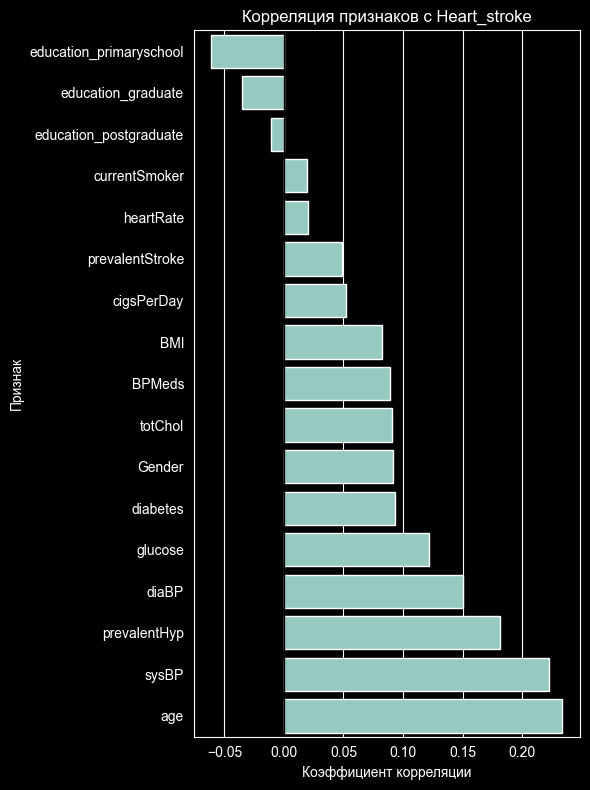

In [14]:
corr_target = (
    df.corr(numeric_only=True)['Heart_stroke']
    .drop('Heart_stroke')
    .sort_values()
)

plt.figure(figsize=(6, 8))
sns.barplot(
    x=corr_target.values,
    y=corr_target.index
)

plt.axvline(0, color='black', linewidth=1)
plt.title('Корреляция признаков с Heart_stroke')
plt.xlabel('Коэффициент корреляции')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

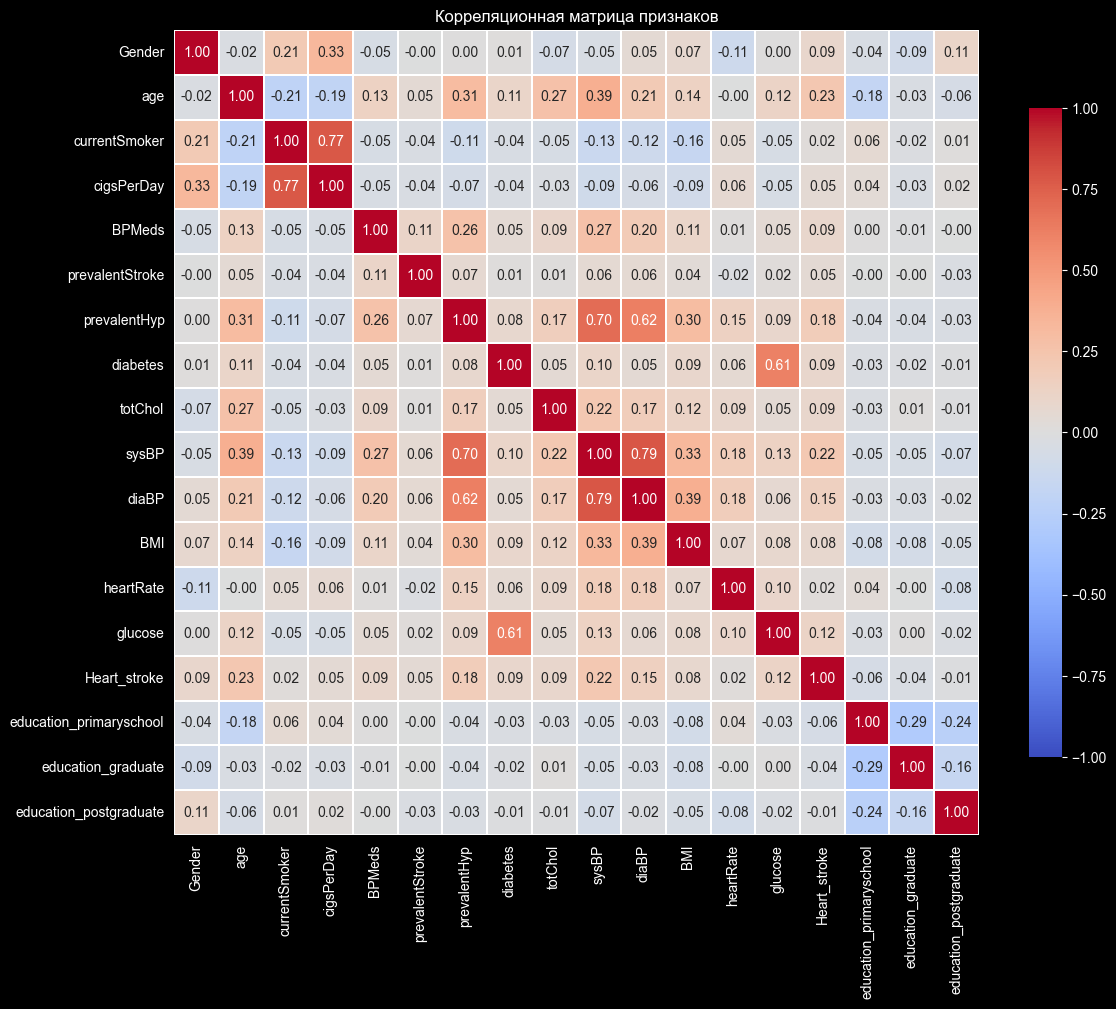

In [15]:
plt.figure(figsize=(12, 10))

corr_matrix = df.corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    annot=True,  # ← ВКЛЮЧАЕМ ЦИФРЫ
    fmt=".2f",  # 2 знака после запятой
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.3,
    cbar_kws={'shrink': 0.8}
)

plt.title('Корреляционная матрица признаков')
plt.tight_layout()
plt.show()

### 2. Подготовка данных: Масштабирование и Разбиение
Для линейных моделей и многих ансамблей важно привести признаки к одному масштабу. Мы разделим данные на обучающую и тестовую выборки (80/20).


In [16]:
# Определение признаков и целевой переменной
X = df.drop('Heart_stroke', axis=1)
y = df['Heart_stroke']

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (2924, 17)
Размер тестовой выборки: (732, 17)


### 3. Обучение модели и оценка качества



# Logistic Regression
Используем `Logistic Regression`, так как она является интерпретируемой моделью и хорошо подходит для медицинских задач, позволяя оценить вклад каждого признака в риск заболевания. Учитывая дисбаланс классов, при оценке качества модели ориентируемся не только на Accuracy, но в первую очередь на Recall, F1-score и ROC-AUC, которые более корректно отражают эффективность модели в задаче скрининга.


In [17]:
# =========================
# 2. Обучение модели
# =========================
logreg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver='liblinear',
    random_state=42
)

logreg.fit(X_train_scaled, y_train)

# =========================
# 3. Вероятности
# =========================
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

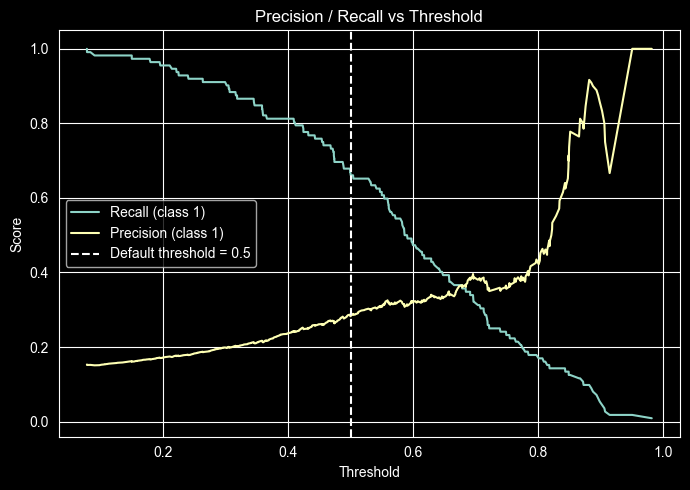

Best threshold: 0.50
Best F1-score (class 1): 0.402


In [18]:
# precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(7, 5))

plt.plot(thresholds, recall[:-1], label='Recall (class 1)')
plt.plot(thresholds, precision[:-1], label='Precision (class 1)')

plt.axvline(0.5, linestyle='--', label='Default threshold = 0.5')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision / Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================
# 4. Автоподбор порога по F1
# =========================
thresholds = np.linspace(0.05, 0.5, 100)

best_threshold = 0
best_f1 = 0

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)

    f1 = f1_score(
        y_test,
        y_pred_t,
        zero_division=0  # <-- убирает warning корректно
    )

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best threshold: {best_threshold:.2f}")
print(f"Best F1-score (class 1): {best_f1:.3f}")


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       620
           1       0.29      0.68      0.40       112

    accuracy                           0.69       732
   macro avg       0.60      0.69      0.60       732
weighted avg       0.83      0.69      0.73       732

ROC-AUC Score: 0.7328


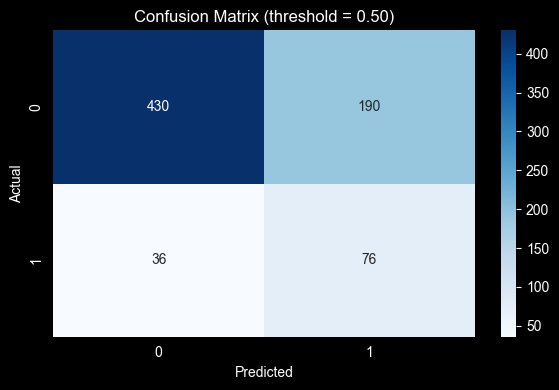

In [19]:
# =========================
# 5. Финальные предсказания
# =========================

# threshold = 0.4
threshold = best_threshold
y_pred_custom = (y_proba >= threshold).astype(int)

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_custom))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# =========================
# 6. Confusion Matrix
# =========================
cm = confusion_matrix(y_test, y_pred_custom)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title(f'Confusion Matrix (threshold = {threshold:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# LogReg + SMOTE

In [20]:
smote = SMOTE(
    sampling_strategy=1.0,
    random_state=42
)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_scaled, y_train
)
print("До SMOTE:", y_train.value_counts())
print("После SMOTE:", pd.Series(y_train_smote).value_counts())

До SMOTE: Heart_stroke
0    2479
1     445
Name: count, dtype: int64
После SMOTE: Heart_stroke
0    2479
1    2479
Name: count, dtype: int64


In [21]:
logreg_smote = LogisticRegression(
    max_iter=1000,
    solver='liblinear',
    random_state=42
)

logreg_smote.fit(X_train_smote, y_train_smote)

y_proba_smote = logreg_smote.predict_proba(X_test_scaled)[:, 1]

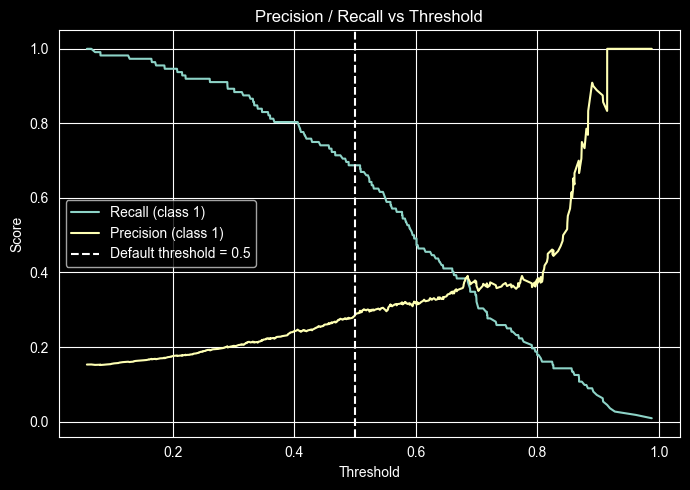

Best threshold: 0.50
Best F1-score (class 1): 0.405


In [22]:
# precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_smote)

plt.figure(figsize=(7, 5))

plt.plot(thresholds, recall[:-1], label='Recall (class 1)')
plt.plot(thresholds, precision[:-1], label='Precision (class 1)')

plt.axvline(0.5, linestyle='--', label='Default threshold = 0.5')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision / Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================
# 4. Автоподбор порога по F1
# =========================
thresholds = np.linspace(0.05, 0.5, 100)

best_threshold = 0
best_f1 = 0

for t in thresholds:
    y_pred_t = (y_proba_smote >= t).astype(int)

    f1 = f1_score(
        y_test,
        y_pred_t,
        zero_division=0  # <-- убирает warning корректно
    )

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best threshold: {best_threshold:.2f}")
print(f"Best F1-score (class 1): {best_f1:.3f}")

Classification Report (LogReg + SMOTE):
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       620
           1       0.29      0.69      0.41       112

    accuracy                           0.69       732
   macro avg       0.61      0.69      0.60       732
weighted avg       0.83      0.69      0.73       732

ROC-AUC: 0.7323012672811058


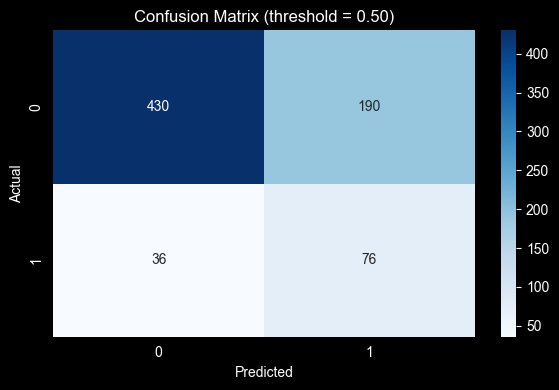

In [23]:
# threshold = 0.2
threshold = best_threshold
y_pred_smote = (y_proba_smote >= threshold).astype(int)


from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("Classification Report (LogReg + SMOTE):")
print(classification_report(y_test, y_pred_smote))

print("ROC-AUC:", roc_auc_score(y_test, y_proba_smote))

# =========================
# 6. Confusion Matrix
# =========================
cm = confusion_matrix(y_test, y_pred_custom)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title(f'Confusion Matrix (threshold = {threshold:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Random Forest

Используем `RandomForestClassifier`, так как он устойчив к выбросам и позволяет оценить важность признаков. Учитывая дисбаланс, будем смотреть не только на Accuracy, но и на F1-score и ROC-AUC.


Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       620
           1       0.71      0.04      0.08       112

    accuracy                           0.85       732
   macro avg       0.78      0.52      0.50       732
weighted avg       0.83      0.85      0.79       732

ROC-AUC Score: 0.7049


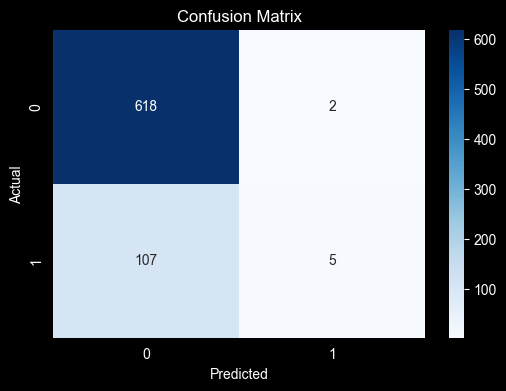

In [24]:
# Инициализация и обучение модели
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Предсказание
y_pred = rf_model.predict(X_test_scaled)
y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
#
# Метрики
print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Матрица ошибок
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Random Forest + setted thresholds

In [25]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)

# 2. Вероятности (ВАЖНО)
y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

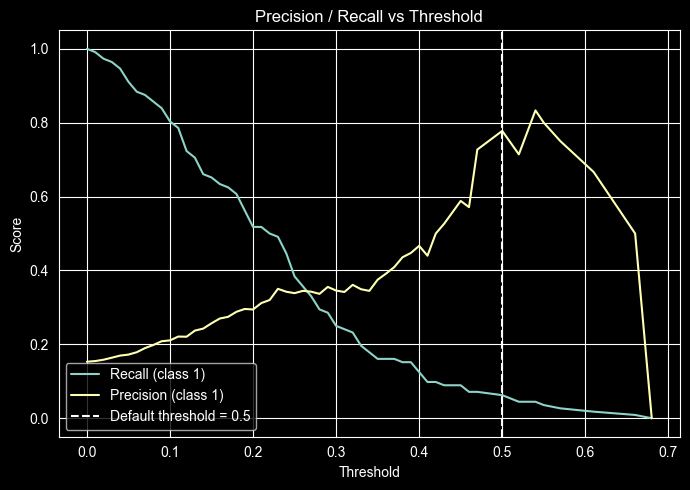

Best threshold: 0.23
Best F1-score: 0.409


In [26]:
# precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(7, 5))

plt.plot(thresholds, recall[:-1], label='Recall (class 1)')
plt.plot(thresholds, precision[:-1], label='Precision (class 1)')

plt.axvline(0.5, linestyle='--', label='Default threshold = 0.5')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision / Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================
# 4. Автоподбор порога по F1
# =========================
thresholds = np.linspace(0.0, 1.0, 101)

best_threshold = 0
best_f1 = 0

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best threshold: {best_threshold:.2f}")
print(f"Best F1-score: {best_f1:.3f}")

Classification Report (threshold = 0.18):
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       620
           1       0.30      0.67      0.41       112

    accuracy                           0.71       732
   macro avg       0.61      0.69      0.61       732
weighted avg       0.83      0.71      0.75       732

ROC-AUC Score: 0.7093


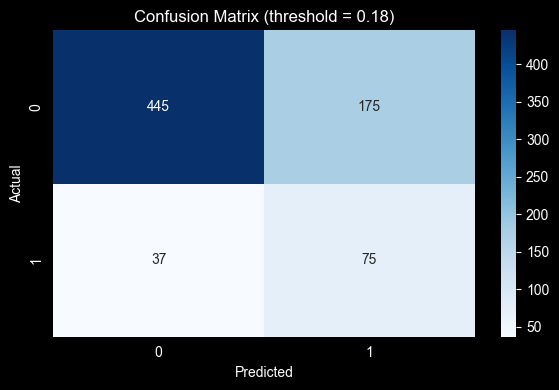

In [33]:
# 3. Кастомный порог

# threshold = best_threshold
threshold = 0.18  # можно менять

y_pred_custom = (y_proba >= threshold).astype(int)

# 4. Метрики
print(f"Classification Report (threshold = {threshold}):")
print(classification_report(y_test, y_pred_custom))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 5. Матрица ошибок
cm = confusion_matrix(y_test, y_pred_custom)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title(f'Confusion Matrix (threshold = {threshold})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Random Forest

In [28]:
rf_model = RandomForestClassifier(
    n_estimators=500,
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)

# 2. Вероятности (ВАЖНО)
y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

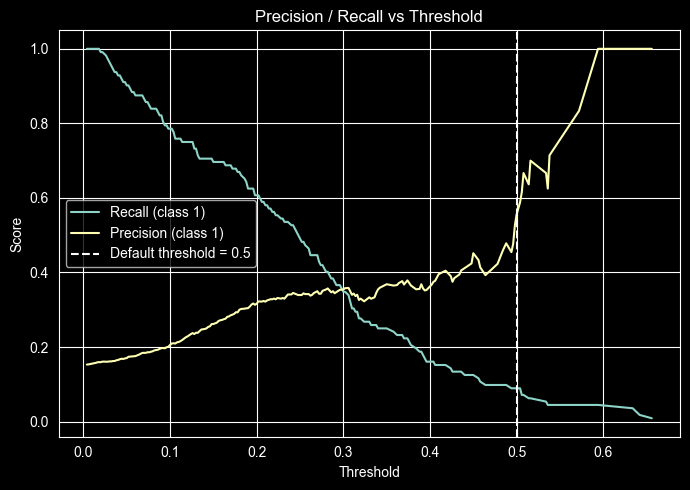

Best threshold: 0.20
Best F1-score: 0.416


In [29]:
# precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(7, 5))

plt.plot(thresholds, recall[:-1], label='Recall (class 1)')
plt.plot(thresholds, precision[:-1], label='Precision (class 1)')

plt.axvline(0.5, linestyle='--', label='Default threshold = 0.5')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision / Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================
# 4. Автоподбор порога по F1
# =========================
thresholds = np.linspace(0.0, 1.0, 101)

best_threshold = 0
best_f1 = 0

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best threshold: {best_threshold:.2f}")
print(f"Best F1-score: {best_f1:.3f}")

Classification Report (threshold = 0.18):
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       620
           1       0.30      0.67      0.41       112

    accuracy                           0.71       732
   macro avg       0.61      0.69      0.61       732
weighted avg       0.83      0.71      0.75       732

ROC-AUC Score: 0.7093


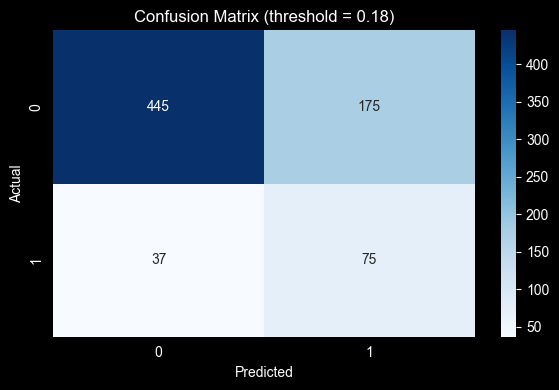

In [30]:
# 3. Кастомный порог

# threshold = best_threshold
threshold = 0.18  # можно менять

y_pred_custom = (y_proba >= threshold).astype(int)

# 4. Метрики
print(f"Classification Report (threshold = {threshold}):")
print(classification_report(y_test, y_pred_custom))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 5. Матрица ошибок
cm = confusion_matrix(y_test, y_pred_custom)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title(f'Confusion Matrix (threshold = {threshold})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

    ### 4. Анализ важности признаков
Для бизнеса и медицины важно понимать, какие факторы больше всего влияют на риск сердечного приступа.


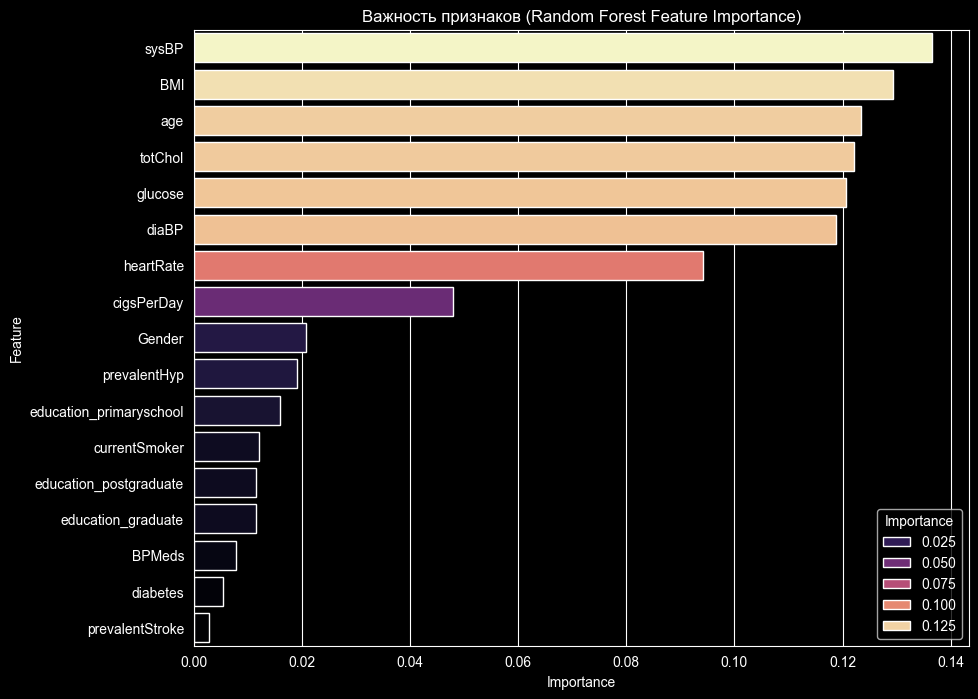

Топ-5 наиболее значимых признаков:
    Feature  Importance
9     sysBP    0.136525
11      BMI    0.129388
1       age    0.123440
8   totChol    0.122083
13  glucose    0.120678


In [31]:
# Извлечение и визуализация важности признаков
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma', hue='Importance')
plt.title('Важность признаков (Random Forest Feature Importance)')
plt.show()

print("Топ-5 наиболее значимых признаков:")
print(feature_importance_df.head(5))
